# TensorFlow Dataset 測試

## 程式參考來源：
- https://www.tensorflow.org/guide/data
- https://www.tensorflow.org/api_docs/python/tf/data/Dataset
- https://www.tensorflow.org/guide/data_performance
- https://www.tensorflow.org/tutorials/keras/text_classification

## 範例1. 自 list 轉入 Dataset

In [1]:
import tensorflow as tf

# 自 list 轉入
dataset = tf.data.Dataset.from_tensor_slices([8, 3, 0, 8, 2, 1])

## 取出所有資料

In [3]:
# 使用 for 迴圈可自 Dataset 取出所有資料
for elem in dataset:
    print(elem.numpy())

8
3
0
8
2
1


## 取出所有資料

In [3]:
# 轉成 iterator
it = iter(dataset)

# 一次取一筆
print(next(it).numpy())
print(next(it).numpy())

8
3


## 範例2. 依照維度小計(reduce)

In [17]:
# 依照維度小計(reduce)
import numpy as np

# 一維資料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

initial_state=0    # 起始值
print(ds.reduce(initial_state, lambda state, value: state + value).numpy()) 

15


In [18]:
# 依照第一維度小計(reduce)
import numpy as np

# 二維資料
ds = tf.data.Dataset.from_tensor_slices(np.arange(1,11).reshape(2,5)) 

initial_state=0    # 起始值
print(ds.reduce(initial_state, lambda state, value: state + value).numpy()) 

[ 7  9 11 13 15]


In [21]:
# 依照第一維度小計(reduce)
import numpy as np

# 三維資料
ds = tf.data.Dataset.from_tensor_slices(np.arange(1,13).reshape(2,2,3)) 

print('原始資料:\n', np.arange(1,13).reshape(2,2,3), '\n')

initial_state=0    # 起始值
print('計算結果:\n', ds.reduce(initial_state, lambda state, value: state + value).numpy()) 

原始資料:
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]] 

計算結果:
 [[ 8 10 12]
 [14 16 18]]


## 範例3. 對每個元素應用函數(map)

In [33]:
# 對每個元素應用函數(map)
import numpy as np

# 測試資料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 對每個元素應用函數(map)
ds = ds.map(lambda x: x * 2)

# 轉成 iterator，再顯示
print(list(ds.as_numpy_iterator())) 

[2, 4, 6, 8, 10]


## 範例4. 過濾(filter)

In [34]:
# 過濾(filter)
import numpy as np

# 測試資料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 對每個元素應用函數(map)
ds = ds.filter(lambda x: x % 2 == 0)

# 轉成 iterator，再顯示
print(list(ds.as_numpy_iterator())) 

[2, 4]


## 範例 5. 資料複製(repeat)

In [25]:
# 資料複製(repeat)
import numpy as np

# 測試資料
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5]) 

# 重複 3 次
ds = ds.repeat(3)

# 轉成 iterator，再顯示
print(list(ds.as_numpy_iterator())) 

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]


## 範例6. Dataset分片(Shard)：將資料依固定間隔取樣

In [30]:
# 分片(Shard)
import numpy as np

# 測試資料：0~10
ds = tf.data.Dataset.range(11)
print('原始資料:\n', list(ds.as_numpy_iterator())) 

# 每 3 筆間隔取樣一筆，從第一筆開始
ds = ds.shard(num_shards=3, index=0)

# 轉成 iterator，再顯示
print('\n計算結果:\n', list(ds.as_numpy_iterator())) 

原始資料:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

計算結果:
 [0, 3, 6, 9]


## 範例7. 將MNIST資料轉入Dataset

In [4]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# 載入 MNIST 手寫阿拉伯數字資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 轉為 Dataset，含 X/Y 資料
dataset = tf.data.Dataset.from_tensor_slices((x_train_norm, y_train))
print(dataset)

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>


## 逐批取資料

In [5]:
# 每次隨機抽出 1000 筆
# shuffle：每次從 60000 筆訓練資料取出 10000 筆洗牌，batch：隨機抽出 1000 筆
train_dataset = dataset.shuffle(10000).batch(1000)
i=0
for (x_train, y_train) in train_dataset:
    if i == 0:
        print(x_train.shape)
        print(x_train[0])
        
    i+=1
print(i)

(1000, 28, 28)
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

60


## 範例8. 自隨機亂數產生 Dataset

In [36]:
import tensorflow as tf

# 隨機亂數產生 Dataset
ds = tf.data.Dataset.from_tensor_slices(
    tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

# 轉成 iterator，再顯示
print(list(ds.as_numpy_iterator())) 

[array([1, 9, 1, 1, 6, 7, 5, 9, 8, 5]), array([3, 8, 1, 3, 9, 7, 1, 2, 3, 6]), array([4, 1, 5, 4, 1, 8, 5, 7, 7, 9]), array([1, 2, 7, 4, 4, 5, 2, 7, 3, 3])]


## 範例9. 自Tensorflow Tensor資料型態的變數轉入 Dataset

In [44]:
import tensorflow as tf

# 稀疏矩陣
mat = tf.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], 
                      dense_shape=[3, 4])

# 轉入 Dataset
ds = tf.data.Dataset.from_tensors(mat)

# 使用迴圈自 Dataset 取出所有資料
for elem in ds:
    print(tf.sparse.to_dense(elem).numpy()) 

[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]]


## 範例10. 自Python Generator資料型態的變數轉入Dataset
#### 程式修改自 https://yann-leguilly.gitlab.io/post/2019-10-09-tensorflow-tfdata/

In [112]:
# 從網路取得壓縮檔，並解壓縮
flowers = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

# 定義參數
BATCH_SIZE = 32 # 批量
IMG_DIM = 224   # 影像寬度
NB_CLASSES = 5  # label 類別數

# 資料增補，rescale：特徵縮放， rotation_range：自動增補旋轉20度內的圖片
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=20)

Found 3670 images belonging to 5 classes.
labels: [0. 1. 0. 0. 0.]


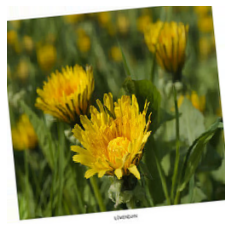

In [113]:
# 取一批檔案
images, labels = next(img_gen.flow_from_directory(flowers))

# 顯示第一筆影像
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.axis('off')
print('labels:', labels[0])

In [ ]:
# 定義 generator 的屬性：取出資料的邏輯
gen = img_gen.flow_from_directory(
    flowers,
    (IMG_DIM, IMG_DIM),
    'rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# 轉入 Dataset
ds = tf.data.Dataset.from_generator(lambda: gen,
    output_signature=(
         tf.TensorSpec(shape=(BATCH_SIZE, IMG_DIM, IMG_DIM, 3)),
         tf.TensorSpec(shape=(BATCH_SIZE, NB_CLASSES))
                     )
    )

In [127]:
# 取下一批資料
it = iter(ds)
images, label = next(it)
print(np.array(images).shape, np.array(label).shape)

(32, 224, 224, 3) (32, 5)
